<a href="https://colab.research.google.com/github/PAWAN0207/Breast-Cancer-Detection-System/blob/main/BREAST_CANCER_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
# Dataset Load
data = load_breast_cancer()

In [ ]:
# Convert the data into dataframe
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['target']= data.target
#df table me ek naya column banao jiska naam target ho, aur usme data.target ki values daal do

In [ ]:
df['target'].value_counts()


,count
target,
1,357
0,212


In [ ]:
# Separated features and labels
X = df.drop('target',axis=1)   # x is feature and target is result so result sould not enter into feature otherwise model ko question wor answer dono mil jayega.
y = df['target']

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
#Split my df into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
# XG boost model
model = xgb.XGBClassifier(n_estimators = 100,learning_rate=0.1,max_depth = 5,subsample = 0.8)

In [ ]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)
# by default threshoild is 0.5

In [ ]:
model.intercept_

array([0.62857145], dtype=float32)

In [ ]:
# Accuracy chcek
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.956140350877193


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[40  3]
 [ 2 69]]


<Axes: >

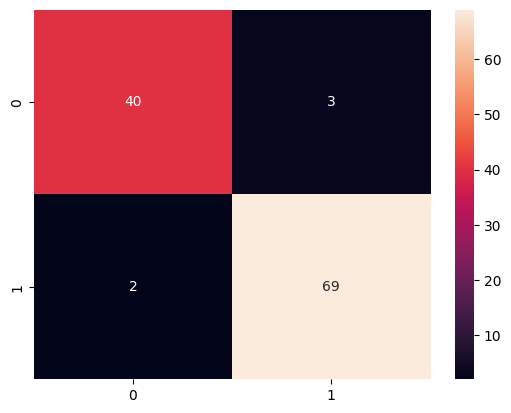

In [ ]:
sns.heatmap(cm,annot=True)

ALUE-BY-VALUE EXPLANATION

🔹 TN = 40

✔️ 40 malignant cases sahi identify hue

🔹 FP = 3

⚠️ 3 benign ko malignant bola

👉 Extra test karwana padega (safe side)

🔹 FN = 2 ❌❌❌

🚨 2 malignant ko benign bola

👉 Most dangerous mistake

🔹 TP = 69

✔️ 69 benign cases sahi pakde

# “Although the model achieved 95.6% accuracy, I focused on recall for malignant cases. The confusion matrix shows only 2 false negatives, which is critical for medical diagnosis.”

 Reduce False Negatives

Change decision threshold

Improve recall

In [ ]:
# STEP 1: Use Probability Instead of Direct Predict

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]


In [ ]:
# changing threshold  from bydefault 0.5 to 0.4.
threshold = 0.4
y_pred_custom = (y_prob >= threshold).astype(int)


- Threshold ↑ → more precision, fewer false positives, but lower recall.

- Threshold ↓ → more recall, fewer false negatives, but lower precision.


In [ ]:
#Reevaluate the model

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[40  3]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
print(cm1)

[[40  3]
 [ 1 70]]


<Axes: >

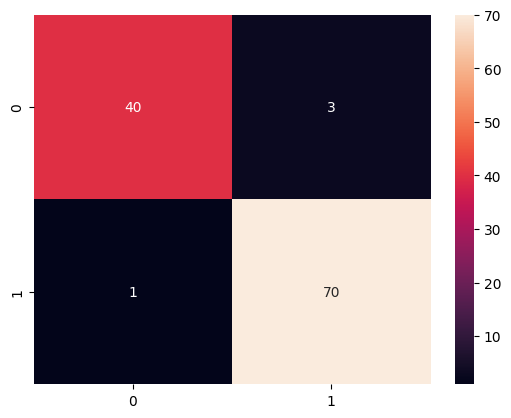

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm1,annot= True)

WHAT IMPROVED?

🔹 False Negatives (MOST IMPORTANT)

Old FN = 2

New FN = 1 ✅

👉 Tumne 1 extra cancer case detect kar liya

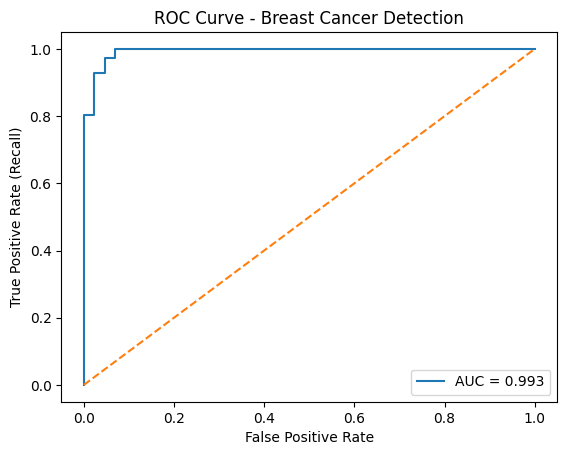

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Breast Cancer Detection")
plt.legend()
plt.show()

1️⃣ What is this graph?

This graph shows:

How good your model is at separating cancer vs non-cancer

2️⃣ X-axis (False Positive Rate)

👉 How often the model raises false alarm

Low value = good

High value = bad

3️⃣ Y-axis (True Positive Rate / Recall)

👉 How many actual cancer cases the model correctly catches

High value = very good

This is what doctors care about

4️⃣ Blue Curve

Your model’s performance

The closer it stays to the top-left corner, the better

👉 Your curve goes almost straight up 🔥
That means:

It catches cancer cases early

With very few false alarms

5️⃣ Orange Dashed Line

This is a random guess

Like flipping a coin 🎲

Your model is far above this line → means it’s actually learning.

🏆 MOST IMPORTANT NUMBER: AUC = 0.993
What does AUC mean?

“If I randomly pick one cancer case and one non-cancer case,
the model will correctly rank them 99.3% of the time.”

# The ROC curve shows that my model achieves a very high true positive rate with a low false positive rate. An AUC of 0.993 indicates excellent separability between malignant and benign tumors, making it suitable for medical screening

In [ ]:
# Featue importance
importance =pd.Series(model.feature_importances_,index = data.feature_names)


In [ ]:
print(pd.Series(importance).sort_values(ascending = False).head())

mean concave points     0.249461
worst perimeter         0.180835
worst concave points    0.158351
worst area              0.061234
worst radius            0.058155
dtype: float32


- Feature importance shows which variables drive the model’s predictions. For example, in cancer detection dataset, mean concave points is the strongest signal, while worst radius contributes less.
